<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tempfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import load_model

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
_, _, X_test_ANN, _, _, y_test, labels = get_data('ANN')
_, _, X_test_CNN, _, _, _, _ = get_data('CNN')
_, _, X_test_LSTM, _, _, _, _ = get_data('LSTM')

In [5]:
def load_model_url(name):
    model_path = tempfile.gettempdir() + f'/{name}.h5'

    if not os.path.isfile(model_path):
        urlretrieve(
            f'https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/models/{name}.h5',
            model_path)
    
    return load_model(model_path)

In [6]:
ann = load_model_url('ANN')
cnn = load_model_url('CNN')
lstm = load_model_url('LSTM')

In [7]:
y_pred_ann = ann.predict(X_test_ANN)
y_pred_cnn = cnn.predict(X_test_CNN)
y_pred_lstm = lstm.predict(X_test_LSTM)

y_pred = np.sum([y_pred_ann, y_pred_cnn, y_pred_lstm], axis=0)

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 [==============================] - 1s 5ms/step


In [8]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.95      0.90      0.92        20
           2       0.83      0.75      0.79        20
           3       0.78      0.70      0.74        20
           4       0.70      0.80      0.74        20
           5       0.90      0.90      0.90        20
           6       0.90      0.90      0.90        20
           7       0.81      0.85      0.83        20
           8       0.71      0.60      0.65        20
           9       0.64      0.80      0.71        20

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.80       200
weighted avg       0.80      0.80      0.80       200



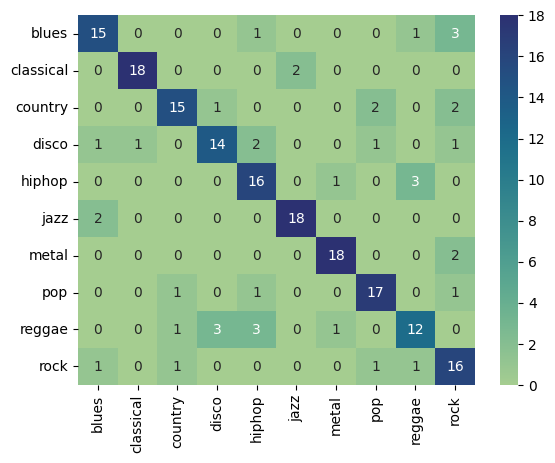

In [9]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('Ensemble_Confusion_Matrix.png', dpi=300)

In [10]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.795


In [11]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.75
classical,0.90
country,0.75
disco,0.70
hiphop,0.80
jazz,0.90
metal,0.90
pop,0.85
reggae,0.60
rock,0.80
